In [80]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = 'C:/Users/xfilh/Documents/Kaggle_dados/Bike Sales Dashboard.xlsx'
arq = pd.ExcelFile(file_path)

In [4]:
df = arq.parse(arq.sheet_names[-1])
df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [5]:
df.isnull().sum()

ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

In [6]:
df.dtypes

ID                   int64
Martial Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Age Brackets        object
Purchased Bike      object
dtype: object

In [7]:
coluna_obj = df.select_dtypes(include='object').columns
coluna_obj

Index(['Martial Status', 'Gender', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Age Brackets', 'Purchased Bike'],
      dtype='object')

In [8]:
for col in coluna_obj:
    freq = df[col].value_counts().reset_index()
    freq.columns = [col, 'Frequency']
    
    fig = px.bar(freq, x=col, y='Frequency', title=f'Frequency on column {col},', color=col)
    fig.show()

In [9]:
df_objeto  = df.select_dtypes(include='object')
df_encoded = pd.get_dummies(df_objeto, drop_first=True, dtype=int)
correla = (df_encoded.corr()['Purchased Bike_Yes'].sort_values(ascending=False) * 100).round(2)
correla = pd.DataFrame(correla)
correla

,Purchased Bike_Yes
Purchased Bike_Yes,100.00
Age Brackets_Middle Age,20.03
Martial Status_Single,11.15
Region_Pacific,10.49
Commute Distance_2-5 Miles,9.28
Occupation_Professional,7.72
Education_Graduate Degree,5.44
Occupation_Manual,-1.38
Home Owner_Yes,-1.52
Gender_Male,-1.52


In [10]:
fig = px.bar(correla, x=correla.index, y='Purchased Bike_Yes', title='Correlation of Purchased Bikes per Column(Object)', color='Purchased Bike_Yes', color_continuous_scale='RdYlBu', text='Purchased Bike_Yes')
fig.update_layout(xaxis_title='Columns(Object)', yaxis_title='Percentual of corr(%)', xaxis_tickangle=-45)
fig.show()

In [11]:
coluna_num = df.select_dtypes(include=int)
coluna_num

,ID,Income,Children,Cars,Age
0,12496,40000,1,0,42
1,24107,30000,3,1,43
2,14177,80000,5,2,60
3,24381,70000,0,1,41
4,25597,30000,0,0,36
...,...,...,...,...,...
995,23731,60000,2,2,54
996,28672,70000,4,0,35
997,11809,60000,2,0,38
998,19664,100000,3,3,38


In [12]:
for col in coluna_num:
    freq = df[col].value_counts().reset_index()
    freq.columns = [col, 'Frequency']
    
    fig = px.bar(freq, x=col, y='Frequency', title=f'Frequency on column {col},', color=col)
    fig.show()

In [13]:
df_num  = df.select_dtypes(include=int)
df_num

,ID,Income,Children,Cars,Age
0,12496,40000,1,0,42
1,24107,30000,3,1,43
2,14177,80000,5,2,60
3,24381,70000,0,1,41
4,25597,30000,0,0,36
...,...,...,...,...,...
995,23731,60000,2,2,54
996,28672,70000,4,0,35
997,11809,60000,2,0,38
998,19664,100000,3,3,38


In [14]:
df_num['Purchased Bike'] = pd.get_dummies(df['Purchased Bike'], drop_first=True, dtype=int)
df_num

,ID,Income,Children,Cars,Age,Purchased Bike
0,12496,40000,1,0,42,0
1,24107,30000,3,1,43,0
2,14177,80000,5,2,60,0
3,24381,70000,0,1,41,1
4,25597,30000,0,0,36,1
...,...,...,...,...,...,...
995,23731,60000,2,2,54,1
996,28672,70000,4,0,35,1
997,11809,60000,2,0,38,1
998,19664,100000,3,3,38,0


In [15]:
correla = (df_num.corr()['Purchased Bike'].sort_values(ascending=False) * 100).round(2)
correla = pd.DataFrame(correla)
correla

,Purchased Bike
Purchased Bike,100.00
ID,5.64
Income,4.97
Age,-10.65
Children,-11.92
Cars,-19.68


In [16]:
fig = px.bar(correla, x=correla.index, y='Purchased Bike', title='Correlation of Purchased Bikes per Column(Int)', color='Purchased Bike', color_continuous_scale='RdYlBu', text='Purchased Bike')
fig.update_layout(xaxis_title='Columns(Int)', yaxis_title='Percentual of corr(%)', xaxis_tickangle=-45)
fig.show()

In [17]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [18]:
df_objeto.mode()

,Martial Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Age Brackets,Purchased Bike
0,Married,Male,Bachelors,Professional,Yes,0-1 Miles,North America,Middle Age,No


In [19]:
group = df.groupby(['Age Brackets', 'Martial Status', 'Region'])['Purchased Bike']
agrupado = pd.DataFrame(group.size())
agrupado

Purchased Bike
Age Brackets Martial Status Region                       
Adolescent   Married        Europe                      3
                            North America              24
                            Pacific                    11
             Single         Europe                     29
                            North America              33
                            Pacific                    10
Middle Age   Married        Europe                    110
                            North America             201
                            Pacific                    61
             Single         Europe                    113
                            North America             145
                            Pacific                    71
Old          Married        Europe                     33
                            North America              72
                            Pacific                    23
             Single         Europe                     12
                            North America              33
                            Pacific                    16

<Axes: ylabel='Age Brackets,Martial Status,Region'>

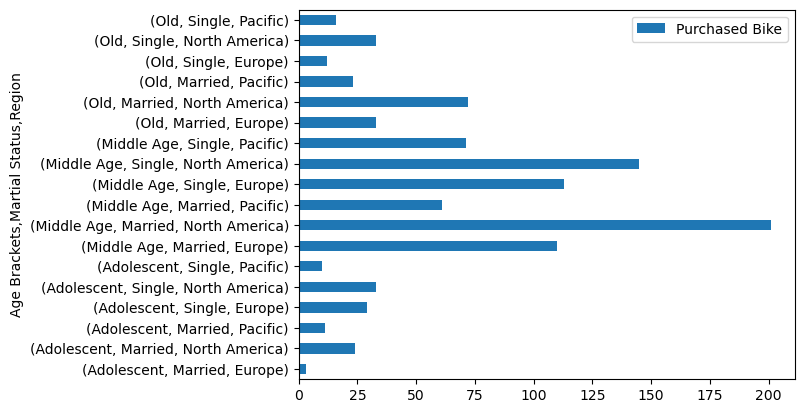

In [20]:
agrupado.plot(kind='barh')

In [21]:
X = df[['Age Brackets', 'Martial Status', 'Region']]
X.head()

,Age Brackets,Martial Status,Region
0,Middle Age,Married,Europe
1,Middle Age,Married,Europe
2,Old,Married,Europe
3,Middle Age,Single,Pacific
4,Middle Age,Single,Europe


In [50]:
y = df['Purchased Bike']
y_enconded = pd.get_dummies(y, dtype=int, drop_first=True)
y_enconded.head()

,Yes
0,0
1,0
2,0
3,1
4,1


In [29]:
enconded = pd.get_dummies(X, dtype=int)
enconded

,Age Brackets_Adolescent,Age Brackets_Middle Age,Age Brackets_Old,Martial Status_Married,Martial Status_Single,Region_Europe,Region_North America,Region_Pacific
0,0,1,0,1,0,1,0,0
1,0,1,0,1,0,1,0,0
2,0,0,1,1,0,1,0,0
3,0,1,0,0,1,0,0,1
4,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,1,0
996,0,1,0,0,1,0,1,0
997,0,1,0,1,0,0,1,0
998,0,1,0,0,1,0,1,0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
X_train, X_test, y_train, y_test = train_test_split(enconded, y_enconded, test_size=0.3, random_state=2)

In [110]:
model = RandomForestClassifier(random_state=2, n_estimators=200)

In [112]:
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=200, random_state=2)

In [113]:
y_pred = model.predict(X_test)

In [114]:
accuracy_score(y_test, y_pred)

0.6633333333333333

In [115]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='micro') 
recall

0.6633333333333333

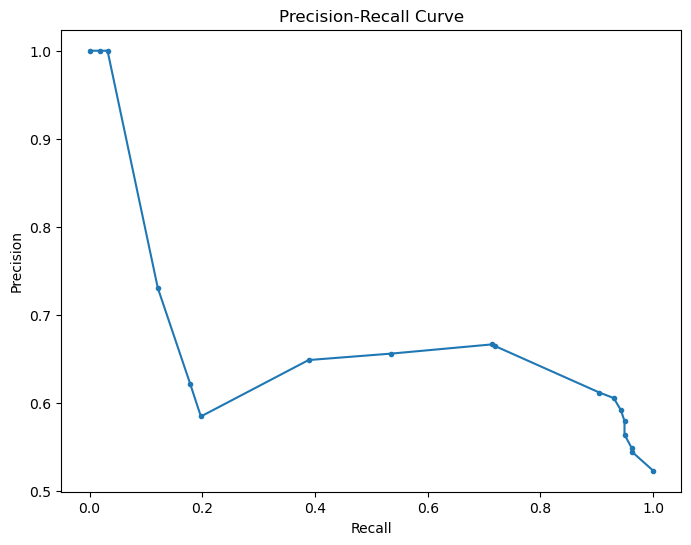

In [116]:
from sklearn.metrics import precision_recall_curve

# Calcular a precisão e recall
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plotar o gráfico
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()